# Kernal PCA

### Data preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split # for training and testing split
from sklearn.preprocessing import StandardScaler # for Feature scaling
from sklearn.decomposition import KernelPCA # for Kernal PCA (for non linear problems)
from sklearn.linear_model import LogisticRegression # for classifier
from sklearn.metrics import confusion_matrix # for making confusion matrix
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [2]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


In [3]:
X[0:10, :]

array([[  1.90000000e+01,   1.90000000e+04],
       [  3.50000000e+01,   2.00000000e+04],
       [  2.60000000e+01,   4.30000000e+04],
       [  2.70000000e+01,   5.70000000e+04],
       [  1.90000000e+01,   7.60000000e+04],
       [  2.70000000e+01,   5.80000000e+04],
       [  2.70000000e+01,   8.40000000e+04],
       [  3.20000000e+01,   1.50000000e+05],
       [  2.50000000e+01,   3.30000000e+04],
       [  3.50000000e+01,   6.50000000e+04]])

In [4]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [5]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
X_train[0:10, :]

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264]])

### Applying Kernal PCA

In [8]:
kernal_pca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kernal_pca.fit_transform(X_train)
X_test = kernal_pca.transform(X_test)

In [9]:
X_train[0:10]

array([[-0.53003086, -0.35781602],
       [ 0.02840279,  0.53035218],
       [ 0.62073943, -0.40226247],
       [-0.05708502,  0.60853904],
       [ 0.29502125,  0.24263861],
       [ 0.39575077, -0.50069924],
       [-0.16536697,  0.55573179],
       [ 0.38535393,  0.43433109],
       [-0.1775384 , -0.57558876],
       [-0.21299263, -0.61901708]])

In [10]:
X_test[0:10]

array([[ 0.03124483,  0.46725717],
       [ 0.50049287,  0.04051636],
       [-0.58799448, -0.2242753 ],
       [ 0.59745597,  0.10840843],
       [-0.53486425, -0.1218985 ],
       [-0.49000067, -0.2156769 ],
       [ 0.66353176, -0.05595593],
       [-0.20138076, -0.4484187 ],
       [ 0.0499621 ,  0.29711545],
       [ 0.01620058,  0.50016371]])

### Fitting Logistic Regression to the Training Set

In [11]:
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predicting Test set result

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
y_pred[0:15]

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [14]:
y_test[0:15]

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

* * *

**This prediction looks good.**

* * *

### Making the Confusion Matrix

In [15]:
cm = confusion_matrix(y_test, y_pred)

In [16]:
cm

array([[48,  4],
       [ 6, 22]])

* * *

**classifier made 48 + 22 = 70 correct prediction and 6 + 4 = 10 incoreect predictions.**

* * *

### Visualizing the training set results

In [17]:
from matplotlib.colors import ListedColormap

In [18]:
X_set, y_set = X_train, y_train

In [19]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                              stop = X_set[:, 0].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                              stop = X_set[:, 1].max() +1, step = 0.01))

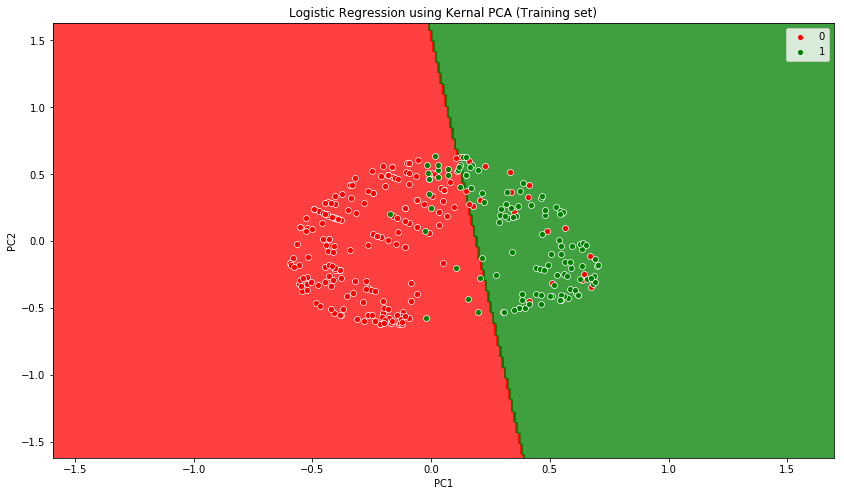

In [20]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75,
            cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j, edgecolors = 'white', linewidth = 0.7)

plt.title('Logistic Regression using Kernal PCA (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

### Visualizing the test set results

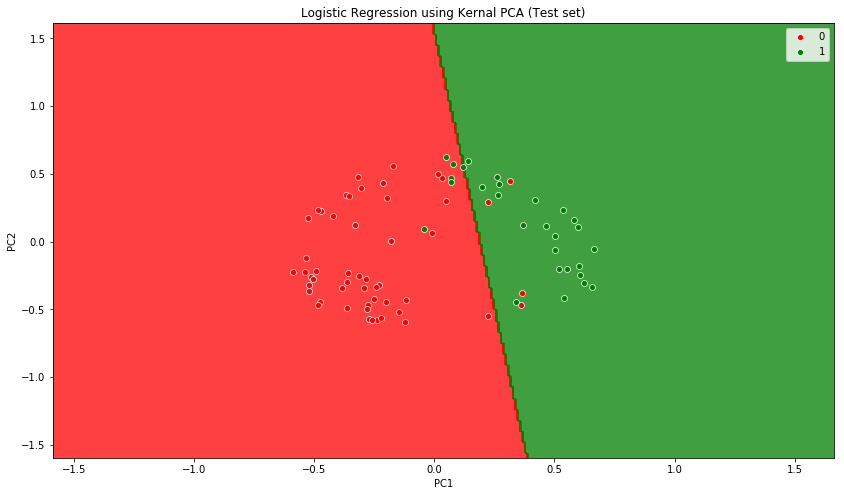

In [21]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                              stop = X_set[:, 0].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                              stop = X_set[:, 1].max() +1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75,
            cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j, edgecolors = 'white', linewidth = 0.7)

plt.title('Logistic Regression using Kernal PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()